# Data Scraping & Data Mining for Beginners to Pro with Python
[Udemy Course](https://www.udemy.com/course/data-scraping-data-mining-from-beginner-to-pro-with-python/learn/lecture/24850712?start=0#overview)

**Data Scraping** Extracting (*importing*) data from the internet; use cases:
- Marketing/lead generation
- eCommerce/competitive analysis
- Research
- Machine learning
- Data for your own website
- Real estate data
- Review applications
- Translation of documents

## Tools
- Python `requests` module, 
- `Beautiful Soup`, 
- `Scrapy`, and
- `Selenium`

## `requests` Module 
[Documentation](https://requests.readthedocs.io/en/master/)

### Project #1 | Quotes to Scrape
[quotes.toscrape.com](quotes.toscrape.com)
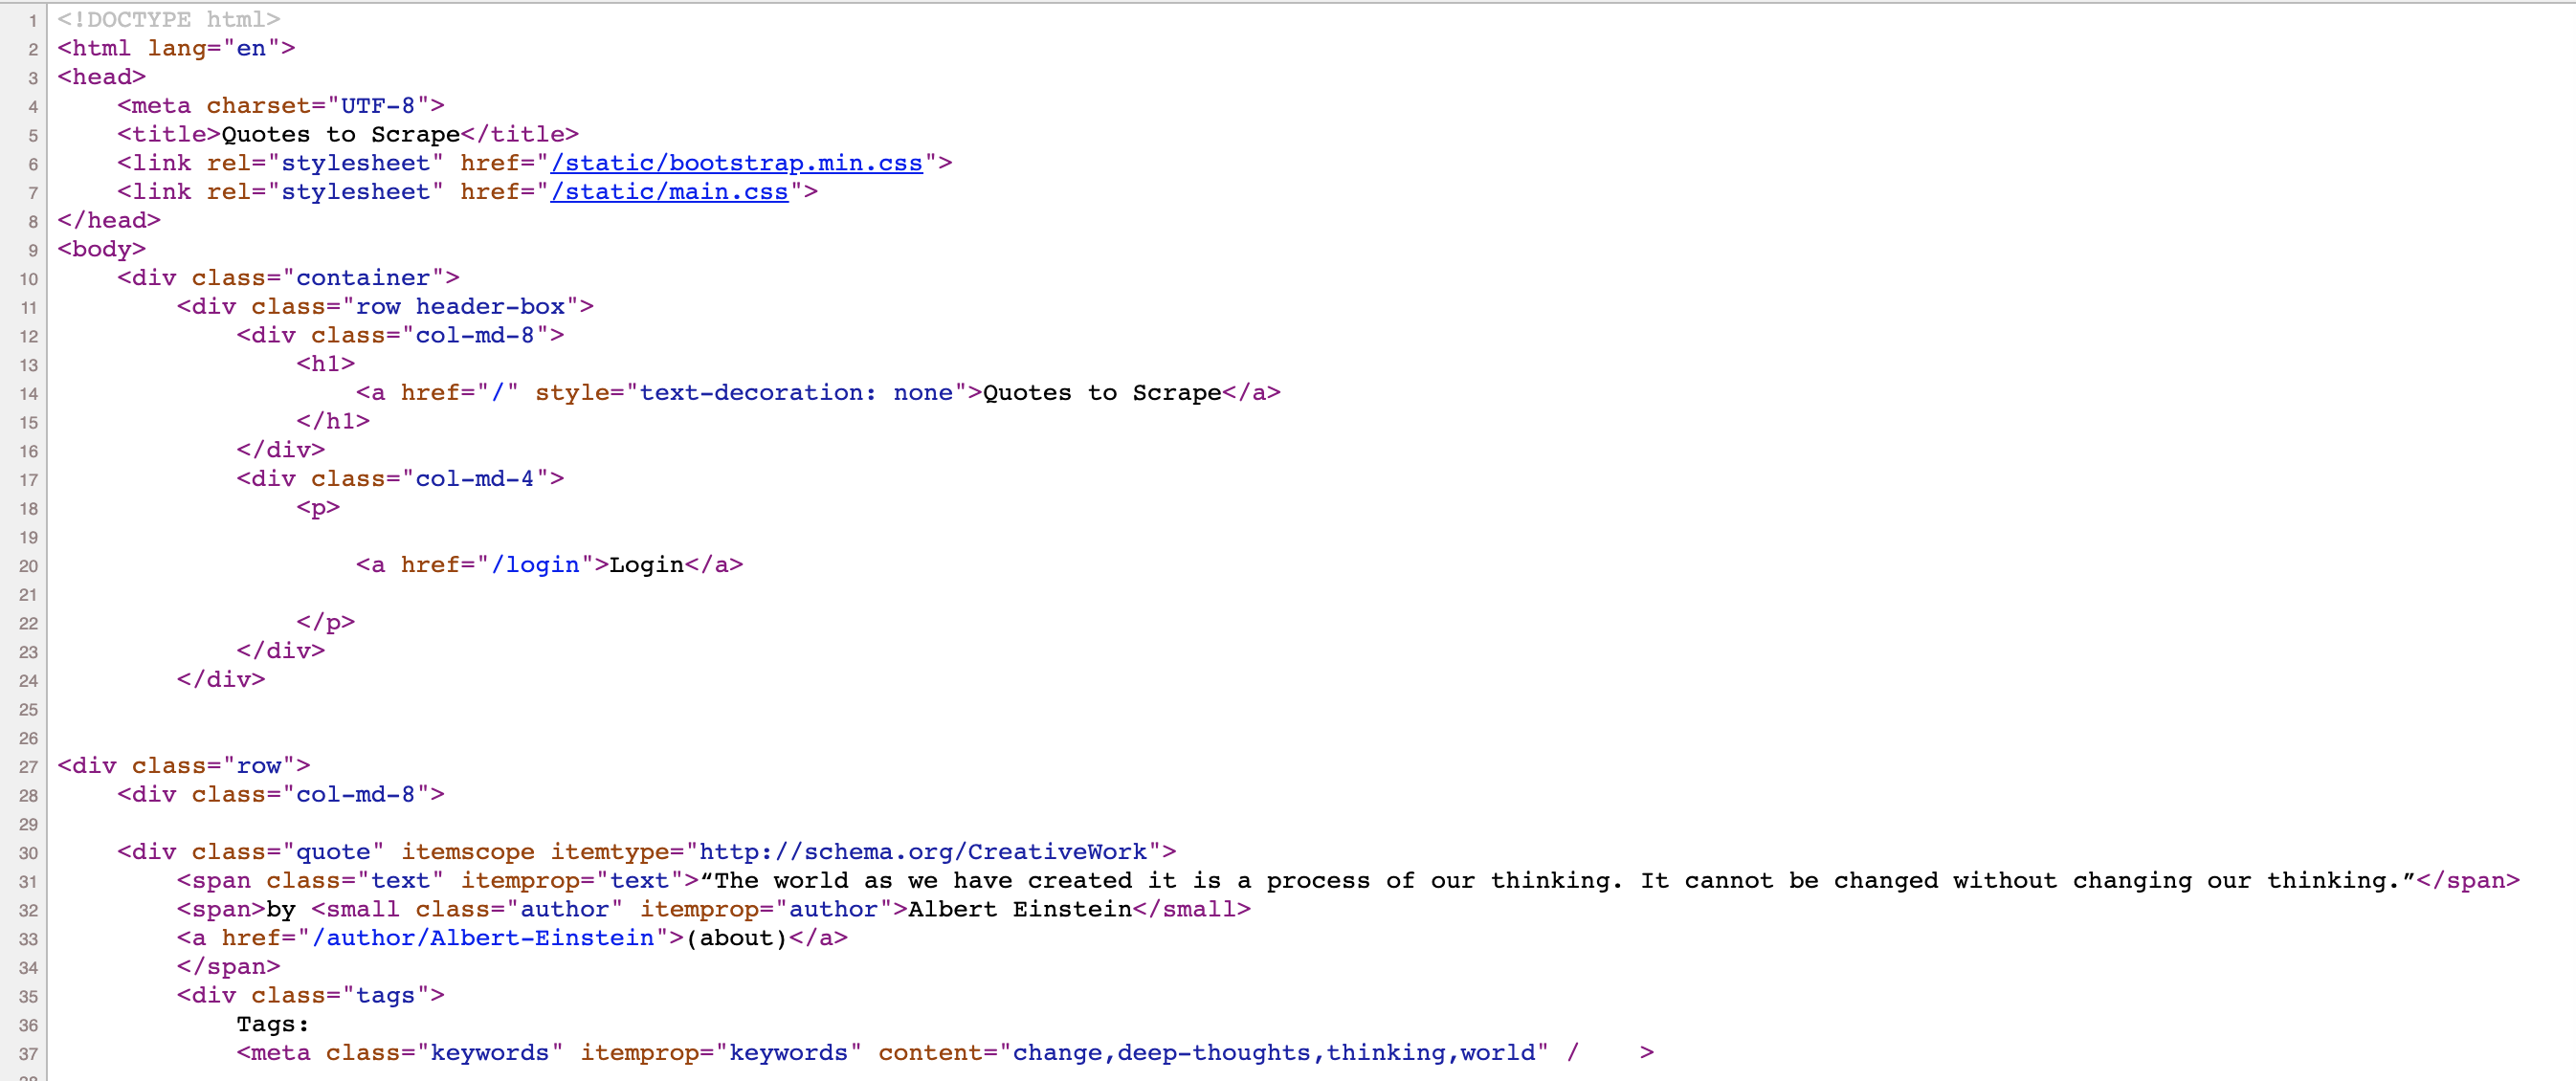

In [1]:
# importing requests library
import requests

# saving url to var
url = 'http://quotes.toscrape.com'

# sending request to server
requests.get(url)

<Response [200]>

In [2]:
# looking at the first 1000 characters of text from the request
requests.get(url).text[:1000]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\n        <sp

In [3]:
# looking at neater printout
print(requests.get(url).text[:2000])

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

In [4]:
# saving html
html = requests.get(url).text
html[:1000]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\n        <sp

In [5]:
# split the html by lines and putting each line into a list as an element
#     breaks up the single html string into a list of multiple strings, one for each line
html.split('\n')[:10]

['<!DOCTYPE html>',
 '<html lang="en">',
 '<head>',
 '\t<meta charset="UTF-8">',
 '\t<title>Quotes to Scrape</title>',
 '    <link rel="stylesheet" href="/static/bootstrap.min.css">',
 '    <link rel="stylesheet" href="/static/main.css">',
 '</head>',
 '<body>',
 '    <div class="container">']

In [6]:
# creating a loop to check line with author link
for line in html.split('\n'):
    if 'a href="/author/' in line:
        print(line)

        <a href="/author/Albert-Einstein">(about)</a>
        <a href="/author/J-K-Rowling">(about)</a>
        <a href="/author/Albert-Einstein">(about)</a>
        <a href="/author/Jane-Austen">(about)</a>
        <a href="/author/Marilyn-Monroe">(about)</a>
        <a href="/author/Albert-Einstein">(about)</a>
        <a href="/author/Andre-Gide">(about)</a>
        <a href="/author/Thomas-A-Edison">(about)</a>
        <a href="/author/Eleanor-Roosevelt">(about)</a>
        <a href="/author/Steve-Martin">(about)</a>


In [7]:
# using same for loop to edit extra text out of the line using replace
for line in html.split('\n'):
    if 'a href="/author/' in line:
        print(line.replace('<a href="/author/', '').replace('">(about)</a>', ''))

        Albert-Einstein
        J-K-Rowling
        Albert-Einstein
        Jane-Austen
        Marilyn-Monroe
        Albert-Einstein
        Andre-Gide
        Thomas-A-Edison
        Eleanor-Roosevelt
        Steve-Martin


In [8]:
# adding for loop results to a file
with open('authors.txt', 'w') as write_authors:
    for line in html.split('\n'):
        if 'a href="/author/' in line:
            #saving lines with authors, replacing extra text with empty string to remove it
            authors = line.replace('<a href="/author/', '').replace('">(about)</a>', '')
            write_authors.write(authors)
            # to put on separate lines
            write_authors.write('\n')

In [9]:
# importing pandas library
import pandas as pd

In [10]:
# reading file I just created to check 
pd.read_csv('authors.txt')

,Albert-Einstein
0,J-K-Rowling
1,Albert-Einstein
2,Jane-Austen
3,Marilyn-Monroe
4,Albert-Einstein
5,Andre-Gide
6,Thomas-A-Edison
7,Eleanor-Roosevelt
8,Steve-Martin


In [11]:
print(html)

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

In [12]:
# doing the same thing for keywords
for line in html.split('\n'):
    print(line)

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

In [13]:
# targeting lines with keyword code
for line in html.split('\n'):
    if 'keyword' in line:
        print(line)

            <meta class="keywords" itemprop="keywords" content="change,deep-thoughts,thinking,world" /    > 
            <meta class="keywords" itemprop="keywords" content="abilities,choices" /    > 
            <meta class="keywords" itemprop="keywords" content="inspirational,life,live,miracle,miracles" /    > 
            <meta class="keywords" itemprop="keywords" content="aliteracy,books,classic,humor" /    > 
            <meta class="keywords" itemprop="keywords" content="be-yourself,inspirational" /    > 
            <meta class="keywords" itemprop="keywords" content="adulthood,success,value" /    > 
            <meta class="keywords" itemprop="keywords" content="life,love" /    > 
            <meta class="keywords" itemprop="keywords" content="edison,failure,inspirational,paraphrased" /    > 
            <meta class="keywords" itemprop="keywords" content="misattributed-eleanor-roosevelt" /    > 
            <meta class="keywords" itemprop="keywords" content="humor,obvious,simile"

In [14]:
# removing extra characters
for line in html.split('\n'):
    if 'keyword' in line:
        line = line.replace('<meta class="keywords" itemprop="keywords" content="', '')\
            .replace('" /    >', '')
        print(line)

            change,deep-thoughts,thinking,world 
            abilities,choices 
            inspirational,life,live,miracle,miracles 
            aliteracy,books,classic,humor 
            be-yourself,inspirational 
            adulthood,success,value 
            life,love 
            edison,failure,inspirational,paraphrased 
            misattributed-eleanor-roosevelt 
            humor,obvious,simile 


In [15]:
# saving keywords to text file
with open('keywords.txt', 'w') as store_keywords:
    for line in html.split('\n'):
        if 'keyword' in line:
            line = line.replace('<meta class="keywords" itemprop="keywords" content="', '')\
                .replace('" /    >', '')
            store_keywords.write(line)
            store_keywords.write('\n')

In [16]:
# checking the text file
pd.read_csv('keywords.txt')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 3, saw 5


### Error...
I am thinking the file reads in commas as field separators and some lines have different numbers of elements

In [18]:
# removing the commas from keyword lines to see if that will allow the 
#     text file to read lines instead of separate fields
for line in html.split('\n'):
    if 'keyword' in line:
        line = line.replace('<meta class="keywords" itemprop="keywords" content="', '')\
            .replace('" /    >', '').replace(',', ' ')
        print(line)

            change deep-thoughts thinking world 
            abilities choices 
            inspirational life live miracle miracles 
            aliteracy books classic humor 
            be-yourself inspirational 
            adulthood success value 
            life love 
            edison failure inspirational paraphrased 
            misattributed-eleanor-roosevelt 
            humor obvious simile 


In [19]:
# saving comma-less keywords to text file
with open('keywords.txt', 'w') as store_keywords:
    for line in html.split('\n'):
        if 'keyword' in line:
            line = line.replace('<meta class="keywords" itemprop="keywords" content="', '')\
                .replace('" /    >', '').replace(',', ' ')
            store_keywords.write(line)
            store_keywords.write('\n')

In [20]:
# trying keywords file again
pd.read_csv('keywords.txt')

,change deep-thoughts thinking world
0,abilities choices
1,inspirational life live miracle mi...
2,aliteracy books classic humor
3,be-yourself inspirational
4,adulthood success value
5,life love
6,edison failure inspirational parap...
7,misattributed-eleanor-roosevelt
8,humor obvious simile
